In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 15
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 15
mlp.rcParams['xtick.color'] = '#4DFC2D'

mlp.rcParams['ytick.major.size'] = 15
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 15
mlp.rcParams['ytick.color'] = '#4DFC2D'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#ED6919'
mlp.rcParams['axes.labelcolor'] = '#ED6919'

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_csv('train.csv').drop('PassengerId', axis=1)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature engineering and EDA

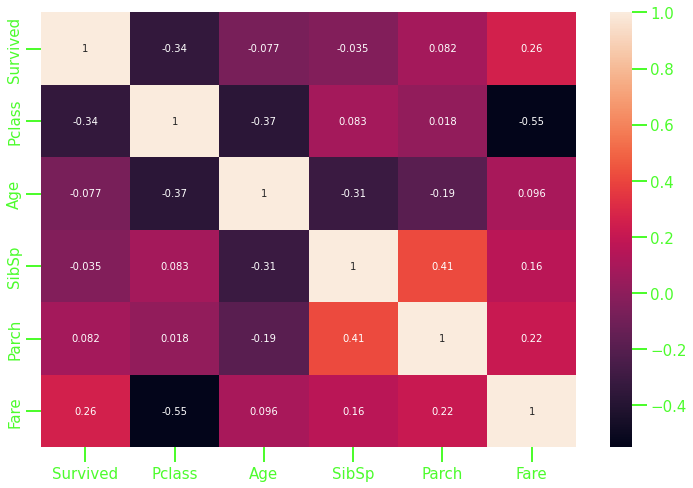

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

plt.show()

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


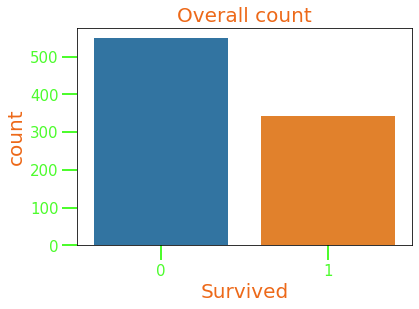

In [7]:
sns.countplot(df.Survived)

plt.title('Overall count')
plt.show()

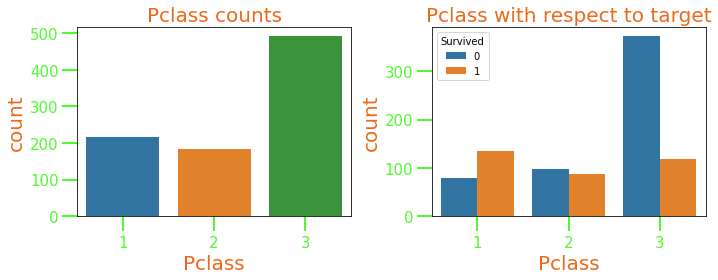

In [8]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(df.Pclass)
plt.title('Pclass counts')


ax2 = fig.add_subplot(1, 2, 2)
sns.countplot(df.Pclass, hue=df.Survived)
plt.title('Pclass with respect to target')

plt.tight_layout()
plt.show()

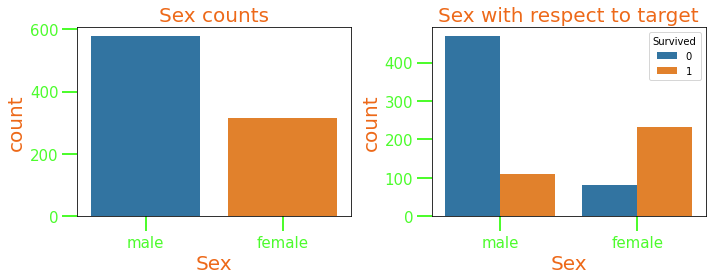

In [9]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(df.Sex)
plt.title('Sex counts')


ax2 = fig.add_subplot(1, 2, 2)
sns.countplot(df.Sex, hue=df.Survived)
plt.title('Sex with respect to target')

plt.tight_layout()
plt.show()

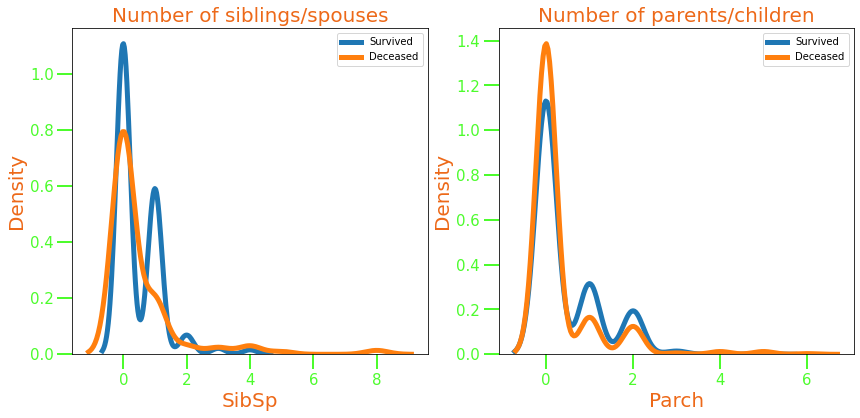

In [10]:
fig = plt.figure(figsize=(14, 6))

survivors = df[df.Survived == 1]
deceased = df[df.Survived == 0]

ax1 = fig.add_subplot(1, 2, 1)
sns.distplot(survivors.SibSp, hist=False)
sns.distplot(deceased.SibSp, hist=False)

plt.title('Number of siblings/spouses')
plt.legend(['Survived', 'Deceased'])

ax2 = fig.add_subplot(1, 2, 2)
sns.distplot(survivors.Parch, hist=False)
sns.distplot(deceased.Parch, hist=False)

plt.title('Number of parents/children')
plt.legend(['Survived', 'Deceased'])

plt.show()

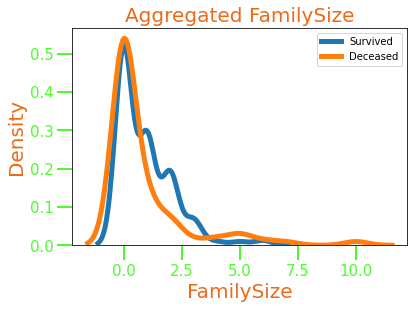

In [11]:
df['FamilySize'] = df.SibSp + df.Parch 

survivors = df[df.Survived == 1]
deceased = df[df.Survived == 0]

ax1 = fig.add_subplot(1, 2, 1)
sns.distplot(survivors.FamilySize, hist=False)
sns.distplot(deceased.FamilySize, hist=False)

plt.title('Aggregated FamilySize')
plt.legend(['Survived', 'Deceased'])
plt.show()

In [12]:
df = df.drop(['SibSp', 'Parch'], axis=1)

df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [13]:
def ticket_contains_only_digits(ticket: str) -> int:
    return int(ticket.isdigit())

df['TicketDigit'] = df.Ticket.apply(ticket_contains_only_digits)
df = df.drop('Ticket', axis=1)

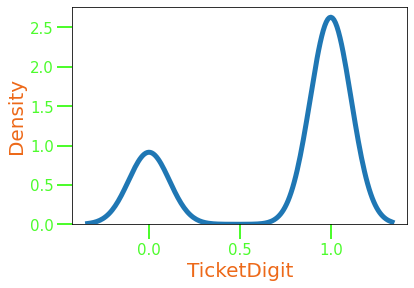

In [14]:
sns.distplot(df.TicketDigit, hist=False)

plt.show()

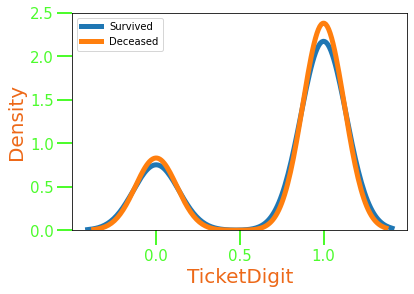

In [15]:
survivors = df[df.Survived == 1]
deceased = df[df.Survived == 0]

sns.distplot(survivors.TicketDigit, hist=False)
sns.distplot(deceased.TicketDigit, hist=False)

plt.legend(['Survived', 'Deceased'])

plt.show()

In [16]:
def name_decompose(name):
    title = name.split()[1]
    length = len(name.replace(' ', ''))
    extras = '(' in name
    
    return title, length, extras

In [17]:
name_decompose(df.Name[3])

('Mrs.', 38, True)

In [18]:
df['Title'] = df.Name.apply(lambda x: x.split()[1])
df['NameLength'] = df.Name.apply(lambda x: len(x.replace(' ', '')))
df['NameExtras'] = df.Name.apply(lambda x: '(' in x)
df = df.drop('Name', axis=1)

df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,TicketDigit,Title,NameLength,NameExtras
0,0,3,male,22.0,7.2500,NaN,S,1,0,Mr.,20,False
1,1,1,female,38.0,71.2833,C85,C,1,0,Mrs.,45,True
2,1,3,female,26.0,7.9250,NaN,S,0,0,Miss.,20,False
3,1,1,female,35.0,53.1000,C123,S,1,1,Mrs.,38,True
4,0,3,male,35.0,8.0500,NaN,S,0,1,Mr.,21,False


In [19]:
df.Title.value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: Title, dtype: int64

In [20]:
titles = [x for x in df.Title.value_counts().index if '.' in x]

titles

['Mr.',
 'Miss.',
 'Mrs.',
 'Master.',
 'Dr.',
 'Rev.',
 'Col.',
 'Mlle.',
 'Major.',
 'Jonkheer.',
 'Capt.',
 'Ms.',
 'Mme.',
 'Don.']

In [21]:
df.Title = df.Title.apply(
    lambda x: x if x in titles and df.Title.value_counts()[x] > 7 else 'other_title_'
).str[:-1]

df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,TicketDigit,Title,NameLength,NameExtras
0,0,3,male,22.0,7.2500,NaN,S,1,0,Mr,20,False
1,1,1,female,38.0,71.2833,C85,C,1,0,Mrs,45,True
2,1,3,female,26.0,7.9250,NaN,S,0,0,Miss,20,False
3,1,1,female,35.0,53.1000,C123,S,1,1,Mrs,38,True
4,0,3,male,35.0,8.0500,NaN,S,0,1,Mr,21,False


In [22]:
df.Title.value_counts()

Mr             502
Miss           179
Mrs            121
other_title     49
Master          40
Name: Title, dtype: int64

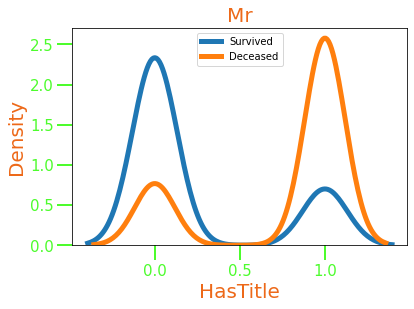

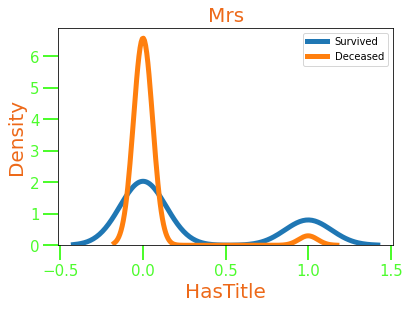

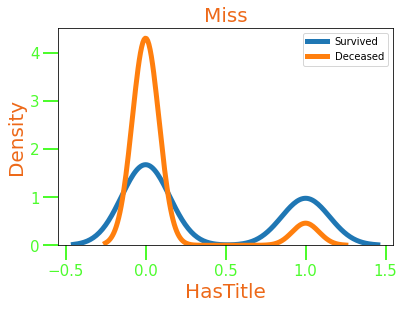

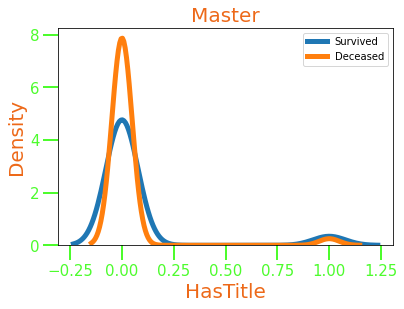

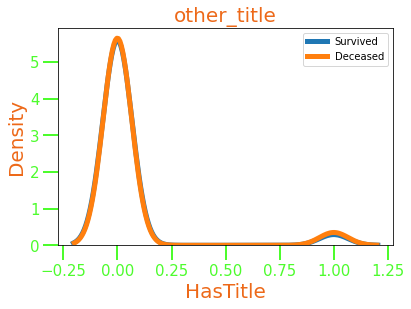

In [23]:
for title in df.Title.unique():
    data = df.copy()
    data['HasTitle'] = (data.Title == title)
    
    survivors = data[data.Survived == 1]
    deceased = data[data.Survived == 0]
    
    sns.distplot(survivors.HasTitle, hist=False)
    sns.distplot(deceased.HasTitle, hist=False)
    
    plt.title(title)
    plt.legend(['Survived', 'Deceased'])
    plt.show()

In [49]:
df.Title

0               Mr
1              Mrs
2             Miss
3              Mrs
4               Mr
          ...     
886    other_title
887           Miss
888           Miss
889             Mr
890             Mr
Name: Title, Length: 891, dtype: object

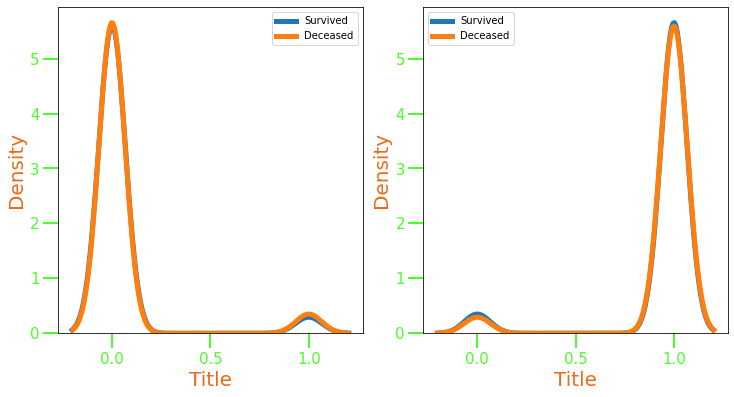

In [50]:
fig = plt.figure(figsize=(12, 6))

survivors = df[df.Survived == 1]
deceased = df[df.Survived == 0]

ax1 = fig.add_subplot(1, 2, 1)
sns.distplot(survivors.Title == 'other_title', hist=False)
sns.distplot(deceased.Title == 'other_title', hist=False)
plt.legend(['Survived', 'Deceased'])


ax2 = fig.add_subplot(1, 2, 2)
sns.distplot(deceased.Title != 'other_title', hist=False)
sns.distplot(survivors.Title != 'other_title', hist=False)
plt.legend(['Survived', 'Deceased'])


plt.show()

In [51]:
df.NameExtras = df.NameExtras.astype(int)

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,TicketDigit,Title,NameLength,NameExtras,CabinIndex
0,0,3,male,22.0,7.2500,S,1,0,Mr,20,0,none_index
1,1,1,female,38.0,71.2833,C,1,0,Mrs,45,1,C
2,1,3,female,26.0,7.9250,S,0,0,Miss,20,0,none_index
3,1,1,female,35.0,53.1000,S,1,1,Mrs,38,1,C
4,0,3,male,35.0,8.0500,S,0,1,Mr,21,0,none_index


## Filling in the missing values

In [52]:
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FamilySize     0
TicketDigit    0
Title          0
NameLength     0
NameExtras     0
CabinIndex     0
dtype: int64

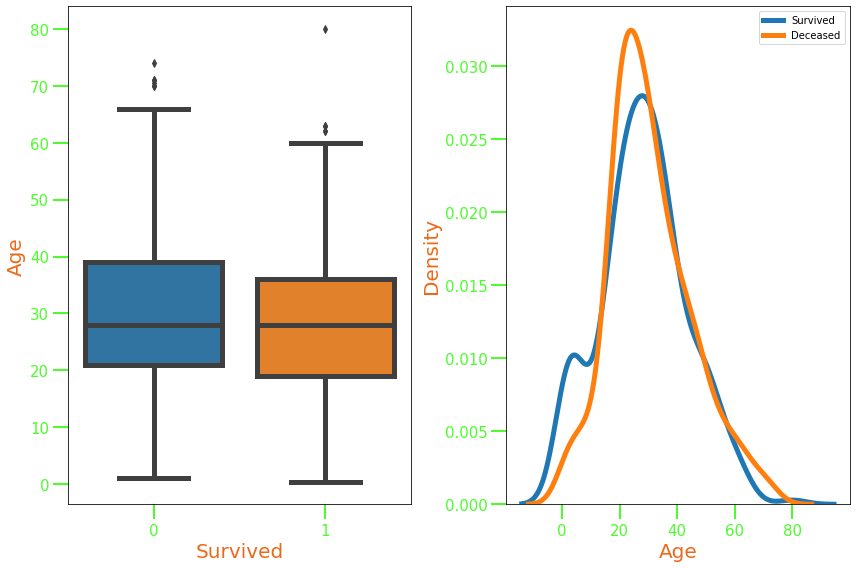

In [27]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(y=df.Age, x=df.Survived)


ax2 = fig.add_subplot(1, 2, 2)
survivors = df[df.Survived == 1]
deceased = df[df.Survived == 0]

sns.distplot(survivors.Age, hist=False)
sns.distplot(deceased.Age, hist=False)
plt.legend(['Survived', 'Deceased'])

plt.tight_layout()
plt.show()

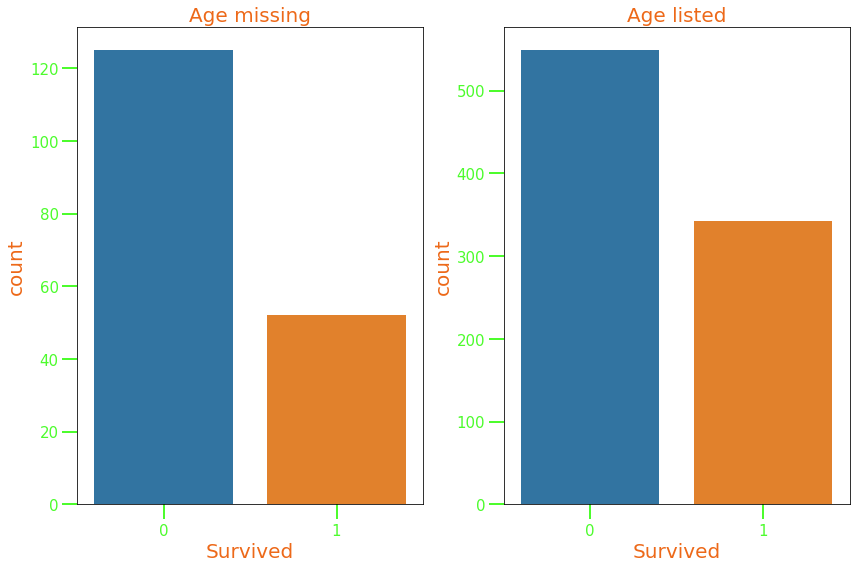

In [28]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1, 2, 1)
missing_ages = df[df.Age.isna()]
sns.countplot(missing_ages.Survived)
plt.title('Age missing')


ax2 = fig.add_subplot(1, 2, 2)
sns.countplot(df.Survived)
plt.title('Age listed')

plt.tight_layout()
plt.show()

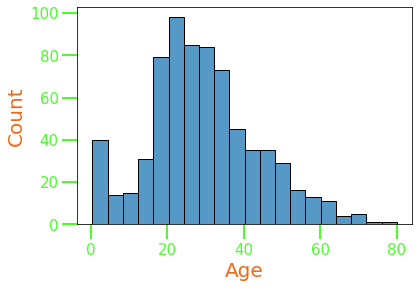

In [29]:
sns.histplot(df.Age)
plt.show()

In [30]:
df.Age.median()

28.0

In [31]:
df.Age = df.Age.fillna(df.Age.median())

df.isna().sum()

Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
TicketDigit      0
Title            0
NameLength       0
NameExtras       0
dtype: int64

In [32]:
df[~df.Cabin.isna()].head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,TicketDigit,Title,NameLength,NameExtras
1,1,1,female,38.0,71.2833,C85,C,1,0,Mrs,45,1
3,1,1,female,35.0,53.1000,C123,S,1,1,Mrs,38,1
6,0,1,male,54.0,51.8625,E46,S,0,1,Mr,20,0
10,1,3,female,4.0,16.7000,G6,S,2,0,Miss,28,0
11,1,1,female,58.0,26.5500,C103,S,0,1,Miss,22,0


In [33]:
df['CabinIndex'] = df.Cabin.str[0]
df = df.drop('Cabin', axis=1)

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,TicketDigit,Title,NameLength,NameExtras,CabinIndex
0,0,3,male,22.0,7.2500,S,1,0,Mr,20,0,NaN
1,1,1,female,38.0,71.2833,C,1,0,Mrs,45,1,C
2,1,3,female,26.0,7.9250,S,0,0,Miss,20,0,NaN
3,1,1,female,35.0,53.1000,S,1,1,Mrs,38,1,C
4,0,3,male,35.0,8.0500,S,0,1,Mr,21,0,NaN


In [34]:
df.CabinIndex = df.CabinIndex.fillna('none_index')

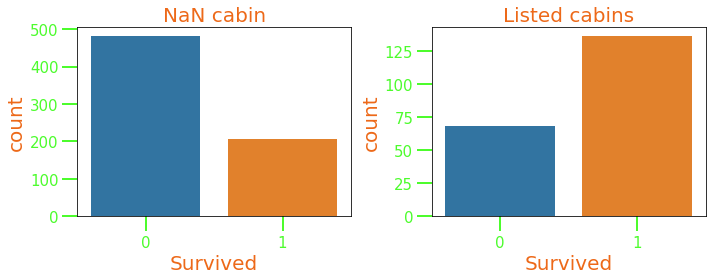

In [35]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(
    x=df[df.CabinIndex == 'none_index'].Survived
)
plt.title('NaN cabin')

ax2 = fig.add_subplot(1, 2, 2)
sns.countplot(
    x=df[df.CabinIndex != 'none_index'].Survived
)
plt.title('Listed cabins')

plt.tight_layout()
plt.show()

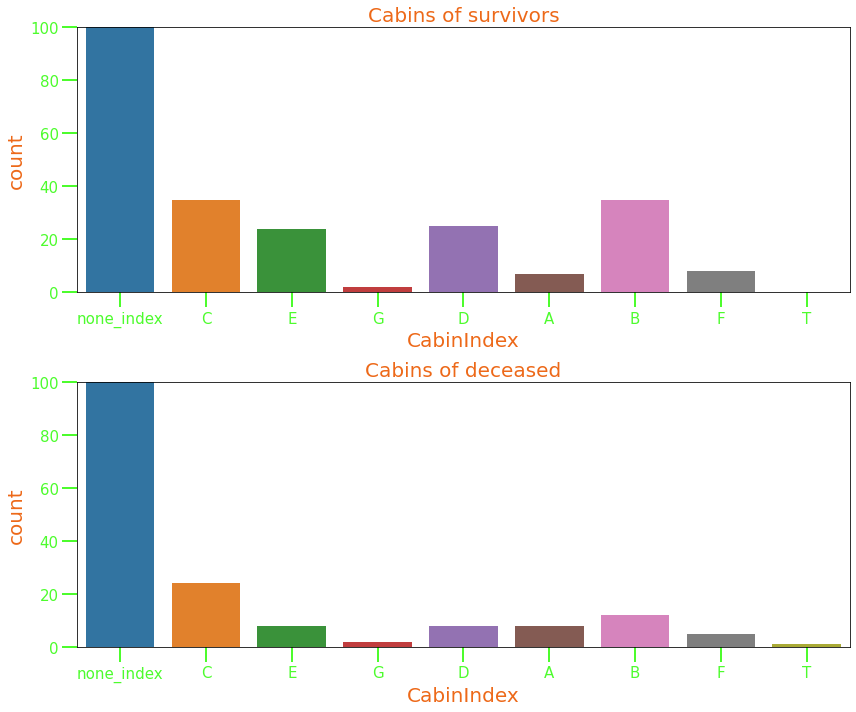

In [36]:
fig = plt.figure(figsize=(12, 10))


survivors = df[df.Survived == 1]
deceased = df[df.Survived == 0]

ax1 = fig.add_subplot(2, 1, 1)
sns.countplot(x=survivors.CabinIndex, order=df.CabinIndex.unique())
plt.title("Cabins of survivors")
plt.ylim(0, 100)


ax2 = fig.add_subplot(2, 1, 2)
sns.countplot(x=deceased.CabinIndex, order=df.CabinIndex.unique())
plt.title("Cabins of deceased")
plt.ylim(0, 100)


plt.tight_layout()
plt.show()

In [37]:
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       2
FamilySize     0
TicketDigit    0
Title          0
NameLength     0
NameExtras     0
CabinIndex     0
dtype: int64

In [38]:
df[df.Embarked.isna()]

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,TicketDigit,Title,NameLength,NameExtras,CabinIndex
61,1,1,female,38.0,80.0,NaN,0,1,Miss,17,0,B
829,1,1,female,62.0,80.0,NaN,0,1,Mrs,36,1,B


In [39]:
df.Embarked = df.Embarked.fillna(df.Embarked.value_counts()[0])

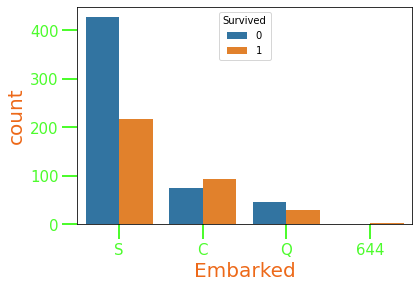

In [40]:
sns.countplot(x=df.Embarked, hue=df.Survived)

plt.show()

In [41]:
df.isna().any()

Survived       False
Pclass         False
Sex            False
Age            False
Fare           False
Embarked       False
FamilySize     False
TicketDigit    False
Title          False
NameLength     False
NameExtras     False
CabinIndex     False
dtype: bool

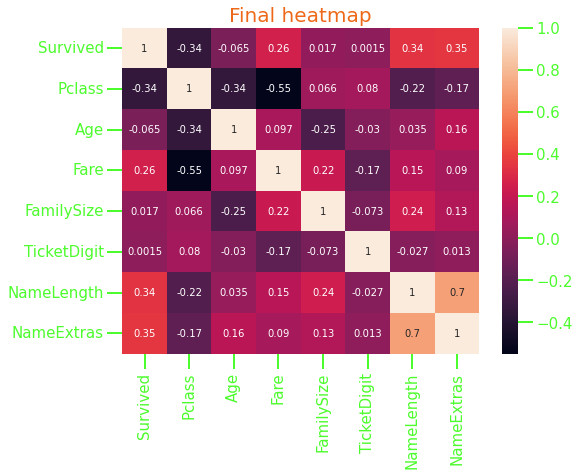

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

plt.title('Final heatmap')
plt.show()

## Custom transformer for the pipeline

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

class TitanicTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols, cat_cols):
        self.cols = cols
        self.cat_cols = cat_cols

    
    def fit(self, X, y=None):
        X[self.cat_cols] = X[self.cat_cols].astype(object)
        
        self.overall_cols = pd.concat(
            (X[self.cols].drop(self.cat_cols, axis=1) \
             , pd.get_dummies(X[self.cat_cols], prefix=self.cat_cols, drop_first=True)),
            axis=1
        ).columns
        
        return self

    
    def transform(self, X, y=None):
        X_ = X[self.cols].copy()
        X_[self.cat_cols] = X_[self.cat_cols].astype(object)


        X_ = pd.concat(
            (X_.drop(self.cat_cols, axis=1),
             pd.get_dummies(X_[self.cat_cols], prefix=self.cat_cols, drop_first=True)),
            axis=1
        )
        
        missing_columns = [col for col in self.overall_cols if col not in X_.columns]
        for col in missing_columns:
            X_[col] = np.zeros(X_.shape[0])
            
        X_ = X_.fillna(X_.median())               
        
        return X_[self.overall_cols]

In [44]:
# cat_cols = ['Pclass', 'Sex', 'Embarked', 'CabinIndex']
cat_cols = ['Pclass', 'Sex', 'Embarked', 'TicketDigit', 'Title', 'NameExtras', 'CabinIndex']

In [45]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,TicketDigit,Title,NameLength,NameExtras,CabinIndex
0,0,3,male,22.0,7.2500,S,1,0,Mr,20,0,none_index
1,1,1,female,38.0,71.2833,C,1,0,Mrs,45,1,C
2,1,3,female,26.0,7.9250,S,0,0,Miss,20,0,none_index
3,1,1,female,35.0,53.1000,S,1,1,Mrs,38,1,C
4,0,3,male,35.0,8.0500,S,0,1,Mr,21,0,none_index


In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

X, y  = df.drop(['Survived'], axis=1), df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [61]:
tr = TitanicTransformer(X_train.columns, cat_cols)

tr.fit_transform(X_train)

,Age,Fare,FamilySize,NameLength,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_other_title,NameExtras_1,CabinIndex_B,CabinIndex_C,CabinIndex_D,CabinIndex_E,CabinIndex_F,CabinIndex_G,CabinIndex_T,CabinIndex_none_index
408,21.0,7.7750,0,29,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
480,9.0,46.9000,7,27,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
510,29.0,7.7500,0,21,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
609,40.0,153.4625,0,22,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
547,28.0,13.8625,0,22,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,18.0,9.3500,1,22,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
871,47.0,52.5542,2,43,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
835,39.0,83.1583,2,24,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
792,28.0,69.5500,10,20,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [62]:
tr.fit(X_train)

tr.transform(X_test).isna().any()

Age                      False
Fare                     False
FamilySize               False
NameLength               False
Pclass_2                 False
Pclass_3                 False
Sex_male                 False
Embarked_C               False
Embarked_Q               False
Embarked_S               False
TicketDigit_1            False
Title_Miss               False
Title_Mr                 False
Title_Mrs                False
Title_other_title        False
NameExtras_1             False
CabinIndex_B             False
CabinIndex_C             False
CabinIndex_D             False
CabinIndex_E             False
CabinIndex_F             False
CabinIndex_G             False
CabinIndex_T             False
CabinIndex_none_index    False
dtype: bool

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# cat_cols = ['Pclass', 'Sex', 'Embarked', 'TicketDigit', 'Title', 'NameExtras', 'CabinIndex']

pipe = Pipeline([
    ('transformer', TitanicTransformer(X_train.columns, cat_cols)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

rf_params = {
     'rf__criterion': ['gini', 'entropy'],
     'rf__max_depth': range(10, 200, 5),
     'rf__min_samples_leaf': range(1, 100, 10),
     'rf__min_samples_split': range(1, 100, 10),
     'rf__n_estimators': range(10, 500, 10)
}

rf_search = RandomizedSearchCV(pipe, rf_params, scoring='accuracy', cv=5, n_jobs=-1)
rf_search.fit(X_train, y_train)

/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequence

/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequence

/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequence

/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/maksim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequence

KeyboardInterrupt: 

In [ ]:
rf_search.best_params_

In [ ]:
rf_search.score(X_train, y_train)

In [ ]:
rf_search.score(X_test, y_test)

In [ ]:
X_test